/home/msp/crematory/venv/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


‚úÖ Í≤∞Í≥º Ï†ÄÏû• ÏôÑÎ£å: model_results_with_purged_cv.csv

=== Ï†ÑÏ≤¥ Í≤∞Í≥º ===
          Model         MAE        RMSE      sMAPE        R¬≤  \
0        Linear   25.693653   32.945003   1.331495  0.983210   
1         Ridge   24.764345   32.431428   1.266870  0.983729   
2  RandomForest   90.367660  162.052854   4.467420  0.593755   
3       XGBoost   66.325748  137.955093   3.175183  0.705592   
4        Linear   32.650216   41.804068   2.241088  0.889886   
5         Ridge   23.481857   30.302824   1.420560  0.938158   
6  RandomForest  202.236420  238.008637  14.356343 -2.799133   
7       XGBoost  175.259050  209.007293  12.103833 -1.821558   

                  Type  
0              Holdout  
1              Holdout  
2              Holdout  
3              Holdout  
4  CV (5-fold, purged)  
5  CV (5-fold, purged)  
6  CV (5-fold, purged)  
7  CV (5-fold, purged)  

=== Î™®Îç∏Î≥Ñ ÌèâÍ∞ÄÏßÄÌëú (Holdout vs CV) ===
                             MAE                           RMSE    

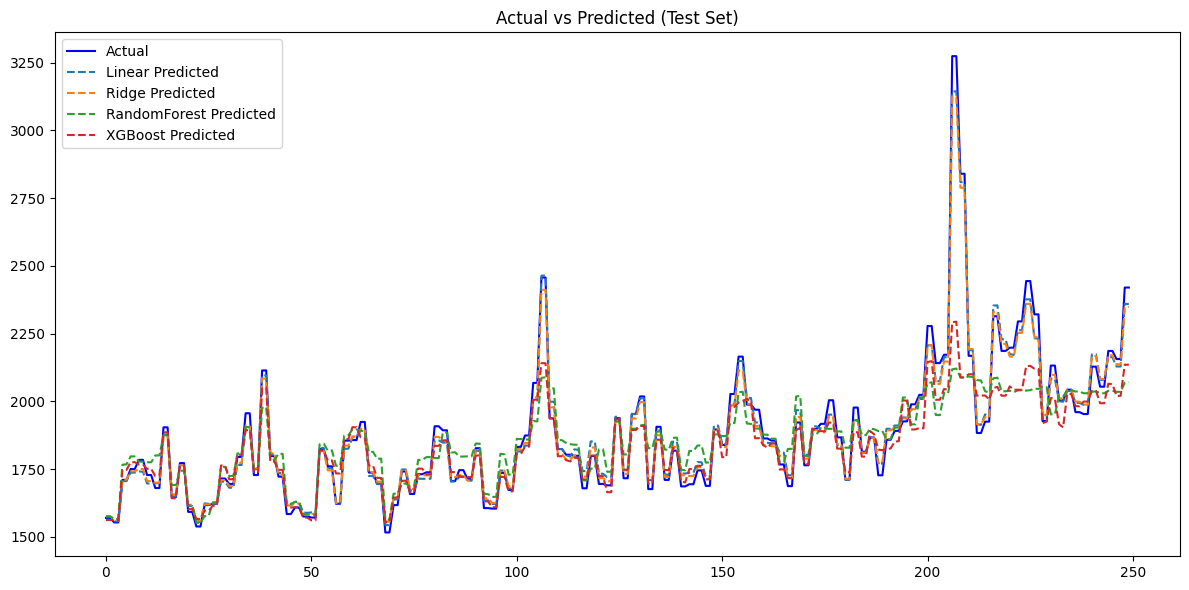

‚úÖ ÏòàÏ∏° Í∑∏ÎûòÌîÑ Ï†ÄÏû• ÏôÑÎ£å: model_predictions.png
‚úÖ RF Î≥ÄÏàò Ï§ëÏöîÎèÑ Ï†ÄÏû• ÏôÑÎ£å: rf_feature_importances.csv


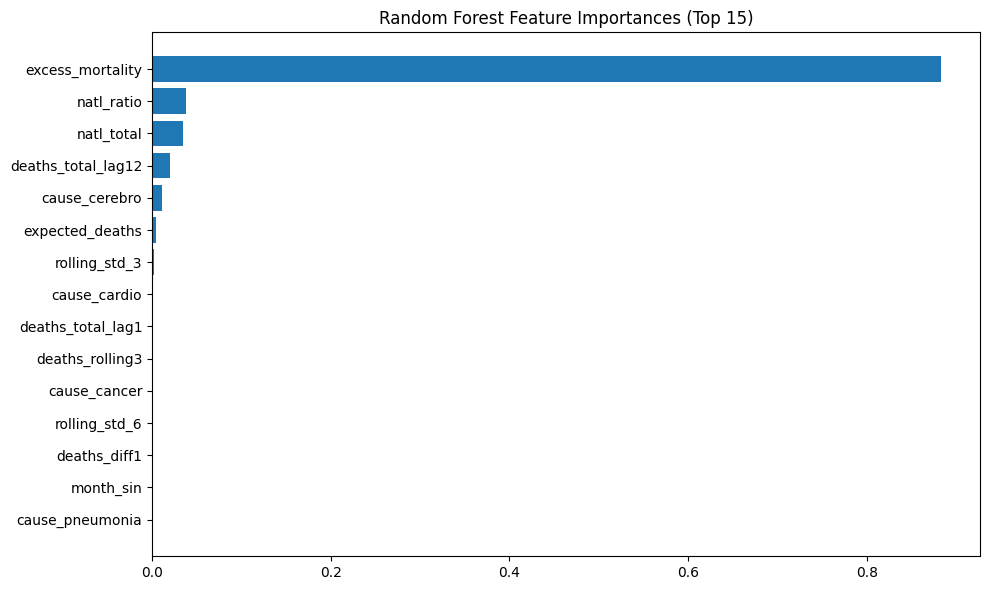

‚úÖ RF Î≥ÄÏàò Ï§ëÏöîÎèÑ Í∑∏ÎûòÌîÑ Ï†ÄÏû• ÏôÑÎ£å: rf_feature_importances.png
‚úÖ XGBoost Î≥ÄÏàò Ï§ëÏöîÎèÑ Ï†ÄÏû• ÏôÑÎ£å: xgb_feature_importances.csv


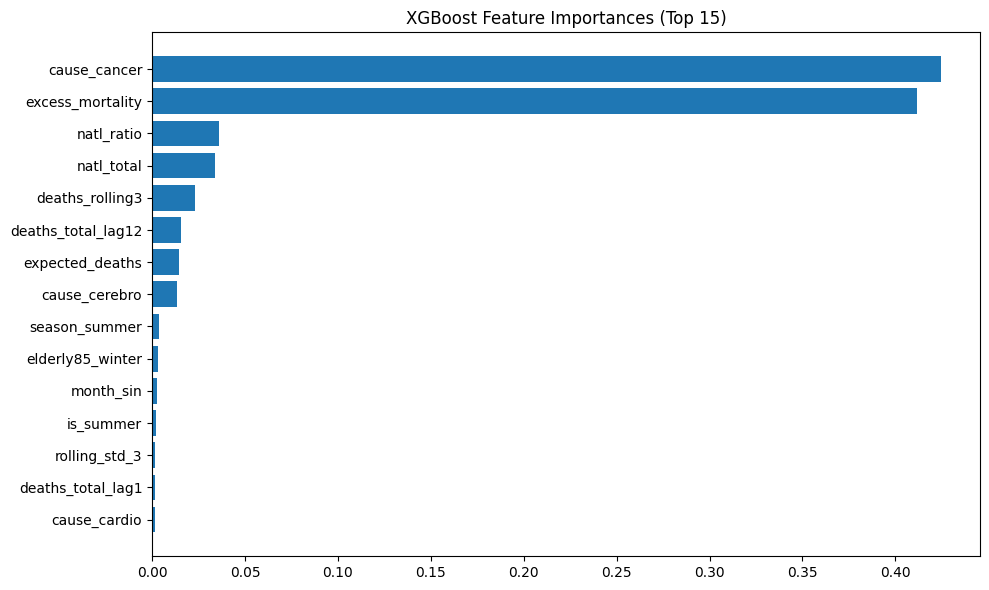

‚úÖ XGBoost Î≥ÄÏàò Ï§ëÏöîÎèÑ Í∑∏ÎûòÌîÑ Ï†ÄÏû• ÏôÑÎ£å: xgb_feature_importances.png


In [1]:
# ==============================
# 0. ÌôòÍ≤Ω ÏÑ§Ï†ï
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer

# ==============================
# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ (v5)
# ==============================
df = pd.read_csv("../data/daegu_gyeongbuk_training_dataset_v6.csv")

drop_cols = ["date", "region"]
X = df.drop(columns=["deaths_total"] + drop_cols)
y = df["deaths_total"].fillna(df["deaths_total"].median())

# ==============================
# 2. ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÎ¶¨ + Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# ==============================
# 3. Î™®Îç∏ Ï†ïÏùò
# ==============================
models = {
    "Linear": LinearRegression(),
    "Ridge": RidgeCV(alphas=np.logspace(-3, 3, 20), cv=5),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(
        n_estimators=300, learning_rate=0.05,
        max_depth=5, subsample=0.8, colsample_bytree=0.8,
        random_state=42
    )
}

# ==============================
# 4. ÌèâÍ∞Ä Ìï®Ïàò
# ==============================
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = mean_squared_error(y_test, preds, squared=False)
    smape = 100/len(y_test) * np.sum(
        2 * np.abs(preds - y_test) / (np.abs(y_test) + np.abs(preds))
    )
    r2 = r2_score(y_test, preds)
    return mae, rmse, smape, r2, preds

# ==============================
# 5. ÌôÄÎìúÏïÑÏõÉ ÌèâÍ∞Ä
# ==============================
results = []
pred_dict = {}
for name, model in models.items():
    mae, rmse, smape, r2, preds = evaluate_model(
        model, X_train, y_train, X_test, y_test
    )
    results.append({
        "Model": name, "MAE": mae, "RMSE": rmse,
        "sMAPE": smape, "R¬≤": r2, "Type": "Holdout"
    })
    pred_dict[name] = preds

# ==============================
# 6. Purged CV Íµ¨ÌòÑ
# ==============================
def purged_cv(X, y, n_splits=5, purge=1):
    fold_size = len(X) // n_splits
    for i in range(n_splits):
        start = 0
        end = fold_size * (i+1)
        train_end = end - fold_size
        val_start = train_end + purge
        if val_start >= end:
            continue
        train_idx = np.arange(start, train_end)
        val_idx = np.arange(val_start, end)
        yield train_idx, val_idx

# ==============================
# 7. ÍµêÏ∞®Í≤ÄÏ¶ù (Purged CV)
# ==============================
for name, model in models.items():
    mae_scores, rmse_scores, smape_scores, r2_scores = [], [], [], []
    for train_idx, val_idx in purged_cv(X_train, y_train, n_splits=5, purge=1):
        if len(train_idx) == 0 or len(val_idx) == 0:
            continue
        X_tr, X_val = X_train[train_idx], X_train[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        model.fit(X_tr, y_tr)
        preds = model.predict(X_val)
        mae_scores.append(mean_absolute_error(y_val, preds))
        rmse_scores.append(mean_squared_error(y_val, preds, squared=False))
        smape_scores.append(
            100/len(y_val) * np.sum(2 * np.abs(preds - y_val) / (np.abs(y_val) + np.abs(preds)))
        )
        r2_scores.append(r2_score(y_val, preds))
    if mae_scores:
        results.append({
            "Model": name,
            "MAE": np.mean(mae_scores),
            "RMSE": np.mean(rmse_scores),
            "sMAPE": np.mean(smape_scores),
            "R¬≤": np.mean(r2_scores),
            "Type": "CV (5-fold, purged)"
        })

# ==============================
# 8. Í≤∞Í≥º Ï†ÄÏû• & Ï∂úÎ†•
# ==============================
results_df = pd.DataFrame(results)
results_df.to_csv("model_results_with_purged_cv.csv", index=False)
print("‚úÖ Í≤∞Í≥º Ï†ÄÏû• ÏôÑÎ£å: model_results_with_purged_cv.csv")

print("\n=== Ï†ÑÏ≤¥ Í≤∞Í≥º ===")
print(results_df)

print("\n=== Î™®Îç∏Î≥Ñ ÌèâÍ∞ÄÏßÄÌëú (Holdout vs CV) ===")
print(results_df.pivot(index="Model", columns="Type", values=["MAE","RMSE","sMAPE","R¬≤"]))

# ==============================
# 9. ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî & Ï†ÄÏû•
# ==============================
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual", color="blue")
for name, preds in pred_dict.items():
    plt.plot(preds, linestyle="--", label=f"{name} Predicted")
plt.title("Actual vs Predicted (Test Set)")
plt.legend()
plt.tight_layout()
plt.savefig("model_predictions.png")
plt.show()
print("‚úÖ ÏòàÏ∏° Í∑∏ÎûòÌîÑ Ï†ÄÏû• ÏôÑÎ£å: model_predictions.png")

# ==============================
# 10. RandomForest Feature Importance
# ==============================
rf_model = models["RandomForest"]
rf_model.fit(X_train, y_train)

feat_names = df.drop(columns=["deaths_total", "date", "region"]).columns
rf_importances = rf_model.feature_importances_

rf_importance_df = pd.DataFrame({
    "Feature": feat_names,
    "Importance": rf_importances
}).sort_values(by="Importance", ascending=False)

rf_importance_df.to_csv("rf_feature_importances.csv", index=False)
print("‚úÖ RF Î≥ÄÏàò Ï§ëÏöîÎèÑ Ï†ÄÏû• ÏôÑÎ£å: rf_feature_importances.csv")

plt.figure(figsize=(10,6))
plt.barh(rf_importance_df["Feature"][:15], rf_importance_df["Importance"][:15])
plt.gca().invert_yaxis()
plt.title("Random Forest Feature Importances (Top 15)")
plt.tight_layout()
plt.savefig("rf_feature_importances.png")
plt.show()
print("‚úÖ RF Î≥ÄÏàò Ï§ëÏöîÎèÑ Í∑∏ÎûòÌîÑ Ï†ÄÏû• ÏôÑÎ£å: rf_feature_importances.png")

# ==============================
# 11. XGBoost Feature Importance
# ==============================
xgb_model = models["XGBoost"]
xgb_model.fit(X_train, y_train)

xgb_importances = xgb_model.feature_importances_  # Í∏∞Î≥∏ = gain Í∏∞Ï§Ä
xgb_importance_df = pd.DataFrame({
    "Feature": feat_names,
    "Importance": xgb_importances
}).sort_values(by="Importance", ascending=False)

xgb_importance_df.to_csv("xgb_feature_importances.csv", index=False)
print("‚úÖ XGBoost Î≥ÄÏàò Ï§ëÏöîÎèÑ Ï†ÄÏû• ÏôÑÎ£å: xgb_feature_importances.csv")

plt.figure(figsize=(10,6))
plt.barh(xgb_importance_df["Feature"][:15], xgb_importance_df["Importance"][:15])
plt.gca().invert_yaxis()
plt.title("XGBoost Feature Importances (Top 15)")
plt.tight_layout()
plt.savefig("xgb_feature_importances.png")
plt.show()
print("‚úÖ XGBoost Î≥ÄÏàò Ï§ëÏöîÎèÑ Í∑∏ÎûòÌîÑ Ï†ÄÏû• ÏôÑÎ£å: xgb_feature_importances.png")


‚úÖ Í≤∞Í≥º Ï†ÄÏû• ÏôÑÎ£å: final_model_results.csv
     Model    Val_MAE   Val_RMSE    Val_R¬≤   Test_MAE   Test_RMSE   Test_R¬≤
0    Ridge  29.911690  36.754310  0.889988  39.112868   51.393589  0.959141
1  XGBoost  37.281006  46.809611  0.821560  84.504906  144.039532  0.679050


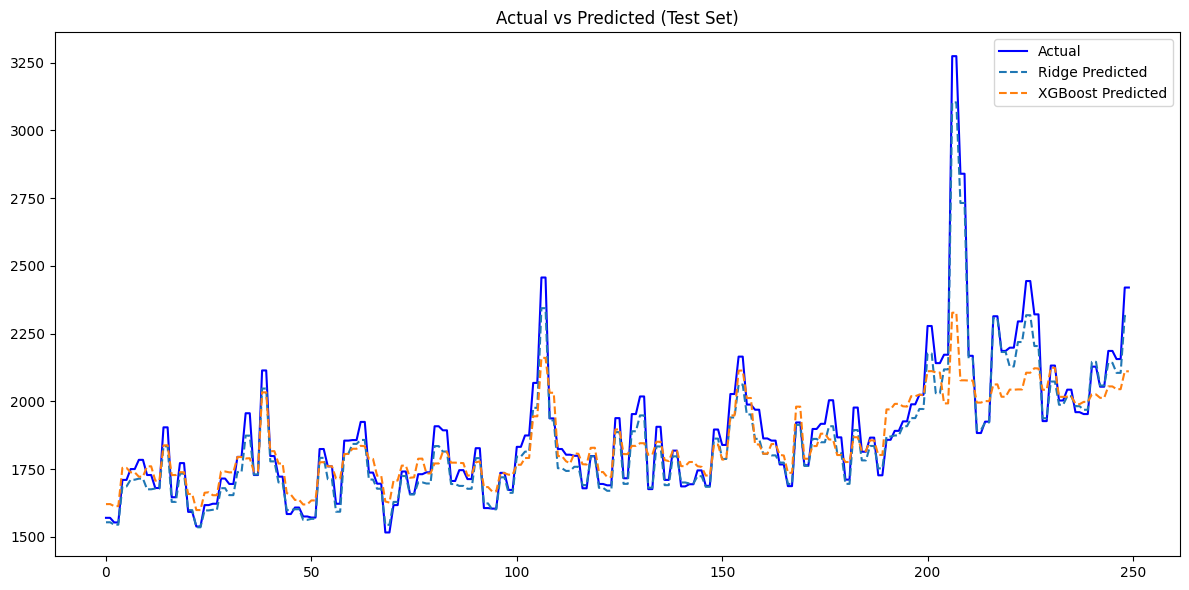

‚úÖ ÏòàÏ∏° Í∑∏ÎûòÌîÑ Ï†ÄÏû• ÏôÑÎ£å: final_model_predictions.png
‚úÖ Î™®Îç∏ Ï†ÄÏû• ÏôÑÎ£å (Ridge_model.pkl, XGBoost_model.pkl)


In [5]:
# ==============================
# 0. ÌôòÍ≤Ω ÏÑ§Ï†ï
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import RidgeCV
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
import joblib

# ==============================
# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ (v6)
# ==============================
df = pd.read_csv("../data/daegu_gyeongbuk_training_dataset_v6.csv")

drop_cols = ["date", "region"]
X = df.drop(columns=["deaths_total"] + drop_cols)
y = df["deaths_total"].fillna(df["deaths_total"].median())

# ==============================
# 2. ÌïôÏäµ/Í≤ÄÏ¶ù/ÌÖåÏä§Ìä∏ Î∂ÑÎ¶¨ + Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
# ==============================
# Î®ºÏ†Ä train/test Î∂ÑÎ¶¨
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)
# train/valid Î∂ÑÎ¶¨
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, shuffle=False
)

# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ (median)
imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

# ==============================
# 3. Î™®Îç∏ Ï†ïÏùò (Ridge, XGBoostÎßå)
# ==============================
models = {
    "Ridge": RidgeCV(alphas=np.logspace(-3, 3, 20), cv=5),
    "XGBoost": XGBRegressor(
        n_estimators=300, learning_rate=0.05,
        max_depth=5, subsample=0.8, colsample_bytree=0.8,
        random_state=42
    )
}

# ==============================
# 4. ÌèâÍ∞Ä Ìï®Ïàò
# ==============================
def evaluate_model(model, X_tr, y_tr, X_val, y_val, X_te, y_te):
    model.fit(X_tr, y_tr)
    val_preds = model.predict(X_val)
    test_preds = model.predict(X_te)

    metrics = {
        "Val_MAE": mean_absolute_error(y_val, val_preds),
        "Val_RMSE": np.sqrt(mean_squared_error(y_val, val_preds)),
        "Val_R¬≤": r2_score(y_val, val_preds),
        "Test_MAE": mean_absolute_error(y_te, test_preds),
        "Test_RMSE": np.sqrt(mean_squared_error(y_te, test_preds)),
        "Test_R¬≤": r2_score(y_te, test_preds)
    }
    return metrics, val_preds, test_preds


# ==============================
# 5. ÌïôÏäµ & Í≤ÄÏ¶ù & ÌÖåÏä§Ìä∏ ÌèâÍ∞Ä
# ==============================
results = []
pred_dict = {}
for name, model in models.items():
    metrics, val_preds, test_preds = evaluate_model(
        model, X_train, y_train, X_val, y_val, X_test, y_test
    )
    results.append({"Model": name, **metrics})
    pred_dict[name] = test_preds

results_df = pd.DataFrame(results)
results_df.to_csv("final_model_results.csv", index=False)
print("‚úÖ Í≤∞Í≥º Ï†ÄÏû• ÏôÑÎ£å: final_model_results.csv")
print(results_df)

# ==============================
# 6. ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî
# ==============================
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual", color="blue")
for name, preds in pred_dict.items():
    plt.plot(preds, linestyle="--", label=f"{name} Predicted")
plt.title("Actual vs Predicted (Test Set)")
plt.legend()
plt.tight_layout()
plt.savefig("final_model_predictions.png")
plt.show()
print("‚úÖ ÏòàÏ∏° Í∑∏ÎûòÌîÑ Ï†ÄÏû• ÏôÑÎ£å: final_model_predictions.png")

# ==============================
# 7. Î™®Îç∏ Ï†ÄÏû•
# ==============================
for name, model in models.items():
    joblib.dump(model, f"{name}_model.pkl")
print("‚úÖ Î™®Îç∏ Ï†ÄÏû• ÏôÑÎ£å (Ridge_model.pkl, XGBoost_model.pkl)")

# ==============================
# 8. Ìñ•ÌõÑ ÏàòÏöî ÏòàÏ∏° ÏòàÏãú
# ==============================
# (X_future: Ìñ•ÌõÑ Îç∞Ïù¥ÌÑ∞ÏÖã ÎßåÎì§Ïñ¥ ÎÑ£ÏúºÎ©¥ ÎèôÏùºÌïòÍ≤å ÏÇ¨Ïö©)
# X_future = ... (Ï∂îÍ∞Ä ÏûÖÎ†•)
# X_future = imputer.transform(X_future)
# preds_future = models["XGBoost"].predict(X_future)
# print("Ìñ•ÌõÑ ÌôîÏû• ÏàòÏöî ÏòàÏ∏°:", preds_future[:10])


‚úÖ Í≤∞Í≥º Ï†ÄÏû• ÏôÑÎ£å: results_dropna.csv
     Model    Val_MAE   Val_RMSE    Val_R¬≤   Test_MAE   Test_RMSE   Test_R¬≤
0    Ridge  21.930338  28.008943  0.939970  31.195136   41.086656  0.974629
1  XGBoost  38.282120  49.822186  0.810057  90.701973  149.549617  0.663871


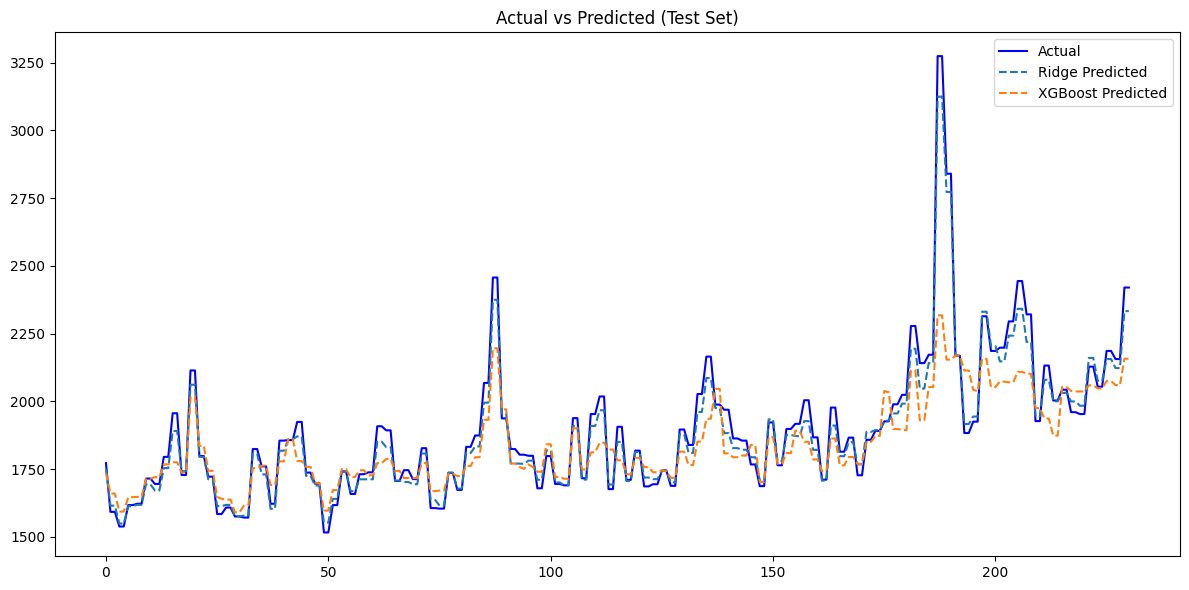

‚úÖ ÏòàÏ∏° Í∑∏ÎûòÌîÑ Ï†ÄÏû• ÏôÑÎ£å: predictions_dropna.png
‚úÖ Î™®Îç∏ Ï†ÄÏû• ÏôÑÎ£å (Ridge_dropna.pkl, XGBoost_dropna.pkl)


In [6]:
# ==============================
# 0. ÌôòÍ≤Ω ÏÑ§Ï†ï
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import RidgeCV
from xgboost import XGBRegressor
import joblib

# ==============================
# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ (v6)
# ==============================
df = pd.read_csv("../data/daegu_gyeongbuk_training_dataset_v6.csv")

drop_cols = ["date", "region"]
X = df.drop(columns=["deaths_total"] + drop_cols)
y = df["deaths_total"]

# üîπ Í≤∞Ï∏°Ïπò ÏûàÎäî Ìñâ ÏÇ≠Ï†ú
data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns=["deaths_total"])
y = data["deaths_total"]

# ==============================
# 2. ÌïôÏäµ/Í≤ÄÏ¶ù/ÌÖåÏä§Ìä∏ Î∂ÑÎ¶¨
# ==============================
# Î®ºÏ†Ä train/test Î∂ÑÎ¶¨
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)
# train/valid Î∂ÑÎ¶¨
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, shuffle=False
)

# ==============================
# 3. Î™®Îç∏ Ï†ïÏùò (Ridge, XGBoostÎßå)
# ==============================
models = {
    "Ridge": RidgeCV(alphas=np.logspace(-3, 3, 20), cv=5),
    "XGBoost": XGBRegressor(
        n_estimators=300, learning_rate=0.05,
        max_depth=5, subsample=0.8, colsample_bytree=0.8,
        random_state=42
    )
}

# ==============================
# 4. ÌèâÍ∞Ä Ìï®Ïàò
# ==============================
def evaluate_model(model, X_tr, y_tr, X_val, y_val, X_te, y_te):
    model.fit(X_tr, y_tr)
    val_preds = model.predict(X_val)
    test_preds = model.predict(X_te)

    metrics = {
        "Val_MAE": mean_absolute_error(y_val, val_preds),
        "Val_RMSE": np.sqrt(mean_squared_error(y_val, val_preds)),
        "Val_R¬≤": r2_score(y_val, val_preds),
        "Test_MAE": mean_absolute_error(y_te, test_preds),
        "Test_RMSE": np.sqrt(mean_squared_error(y_te, test_preds)),
        "Test_R¬≤": r2_score(y_te, test_preds)
    }
    return metrics, val_preds, test_preds


# ==============================
# 5. ÌïôÏäµ & Í≤ÄÏ¶ù & ÌÖåÏä§Ìä∏ ÌèâÍ∞Ä
# ==============================
results = []
pred_dict = {}
for name, model in models.items():
    metrics, val_preds, test_preds = evaluate_model(
        model, X_train, y_train, X_val, y_val, X_test, y_test
    )
    results.append({"Model": name, **metrics})
    pred_dict[name] = test_preds

results_df = pd.DataFrame(results)
results_df.to_csv("results_dropna.csv", index=False)   # üîπ ÌååÏùºÎ™Ö Î≥ÄÍ≤Ω
print("‚úÖ Í≤∞Í≥º Ï†ÄÏû• ÏôÑÎ£å: results_dropna.csv")
print(results_df)

# ==============================
# 6. ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî
# ==============================
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual", color="blue")
for name, preds in pred_dict.items():
    plt.plot(preds, linestyle="--", label=f"{name} Predicted")
plt.title("Actual vs Predicted (Test Set)")
plt.legend()
plt.tight_layout()
plt.savefig("predictions_dropna.png")   # üîπ ÌååÏùºÎ™Ö Î≥ÄÍ≤Ω
plt.show()
print("‚úÖ ÏòàÏ∏° Í∑∏ÎûòÌîÑ Ï†ÄÏû• ÏôÑÎ£å: predictions_dropna.png")

# ==============================
# 7. Î™®Îç∏ Ï†ÄÏû•
# ==============================
for name, model in models.items():
    joblib.dump(model, f"{name}_dropna.pkl")   # üîπ ÌååÏùºÎ™Ö Î≥ÄÍ≤Ω
print("‚úÖ Î™®Îç∏ Ï†ÄÏû• ÏôÑÎ£å (Ridge_dropna.pkl, XGBoost_dropna.pkl)")

# ==============================
# 8. Ìñ•ÌõÑ ÏàòÏöî ÏòàÏ∏° ÏòàÏãú
# ==============================
# (X_future: Ìñ•ÌõÑ Îç∞Ïù¥ÌÑ∞ÏÖã ÎßåÎì§Ïñ¥ ÎÑ£ÏúºÎ©¥ ÎèôÏùºÌïòÍ≤å ÏÇ¨Ïö©)
# X_future = ... (Ï∂îÍ∞Ä ÏûÖÎ†•)
# preds_future = models["XGBoost"].predict(X_future.dropna())
# print("Ìñ•ÌõÑ ÌôîÏû• ÏàòÏöî ÏòàÏ∏°:", preds_future[:10])


‚úÖ Í≤∞Í≥º Ï†ÄÏû• ÏôÑÎ£å: results_dropna.csv
     Model    Val_MAE   Val_RMSE    Val_R¬≤   Test_MAE   Test_RMSE   Test_R¬≤
0    Ridge  21.930338  28.008943  0.939970  31.195136   41.086656  0.974629
1  XGBoost  38.282120  49.822186  0.810057  90.701973  149.549617  0.663871


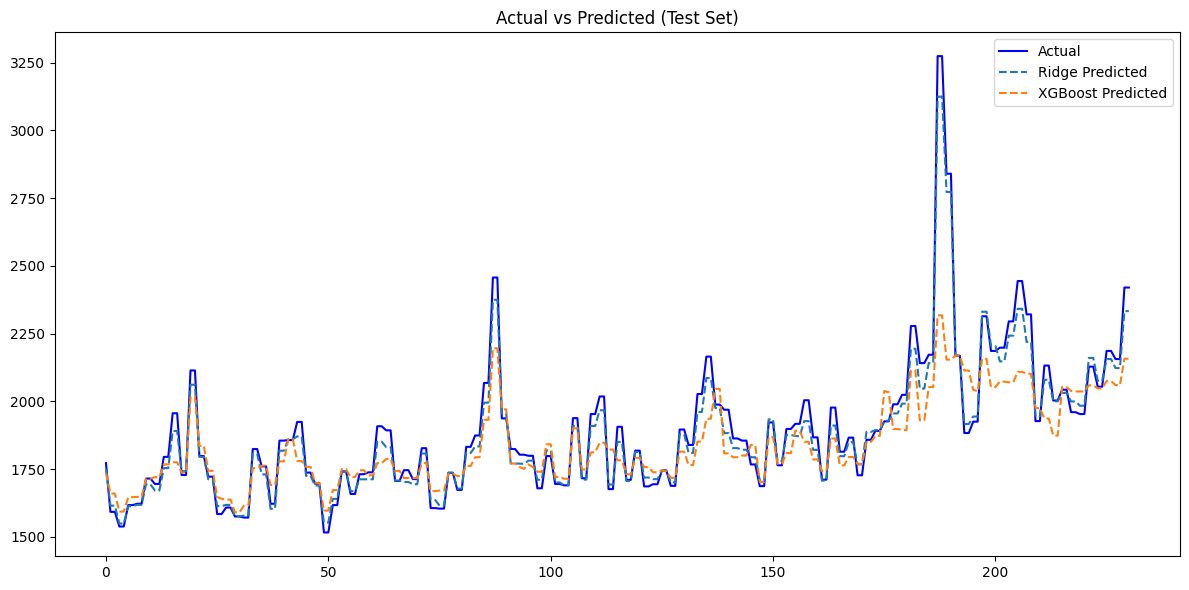

‚úÖ ÏòàÏ∏° Í∑∏ÎûòÌîÑ Ï†ÄÏû• ÏôÑÎ£å: predictions_dropna.png
‚úÖ Î™®Îç∏ Ï†ÄÏû• ÏôÑÎ£å (Ridge_dropna.pkl, XGBoost_dropna.pkl)


In [9]:
# ==============================
# 0. ÌôòÍ≤Ω ÏÑ§Ï†ï
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import RidgeCV
from xgboost import XGBRegressor
import joblib

# ==============================
# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ (v6)
# ==============================
df = pd.read_csv("../data/daegu_gyeongbuk_training_dataset_v6.csv")

drop_cols = ["date", "region"]
X = df.drop(columns=["deaths_total"] + drop_cols)
y = df["deaths_total"]

# üîπ Í≤∞Ï∏°Ïπò ÏûàÎäî Ìñâ ÏÇ≠Ï†ú
data = pd.concat([X, y], axis=1).dropna()
X = data.drop(columns=["deaths_total"])
y = data["deaths_total"]

# ==============================
# 2. ÌïôÏäµ/Í≤ÄÏ¶ù/ÌÖåÏä§Ìä∏ Î∂ÑÎ¶¨
# ==============================
# Î®ºÏ†Ä train/test Î∂ÑÎ¶¨
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)
# train/valid Î∂ÑÎ¶¨
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, shuffle=False
)

# ==============================
# 3. Î™®Îç∏ Ï†ïÏùò (Ridge, XGBoostÎßå)
# ==============================
models = {
    "Ridge": RidgeCV(alphas=np.logspace(-3, 3, 20), cv=5),
    "XGBoost": XGBRegressor(
        n_estimators=300, learning_rate=0.05,
        max_depth=5, subsample=0.8, colsample_bytree=0.8,
        random_state=42
    )
}

# ==============================
# 4. ÌèâÍ∞Ä Ìï®Ïàò
# ==============================
def evaluate_model(model, X_tr, y_tr, X_val, y_val, X_te, y_te):
    model.fit(X_tr, y_tr)
    val_preds = model.predict(X_val)
    test_preds = model.predict(X_te)

    metrics = {
        "Val_MAE": mean_absolute_error(y_val, val_preds),
        "Val_RMSE": np.sqrt(mean_squared_error(y_val, val_preds)),
        "Val_R¬≤": r2_score(y_val, val_preds),
        "Test_MAE": mean_absolute_error(y_te, test_preds),
        "Test_RMSE": np.sqrt(mean_squared_error(y_te, test_preds)),
        "Test_R¬≤": r2_score(y_te, test_preds)
    }
    return metrics, val_preds, test_preds


# ==============================
# 5. ÌïôÏäµ & Í≤ÄÏ¶ù & ÌÖåÏä§Ìä∏ ÌèâÍ∞Ä
# ==============================
results = []
pred_dict = {}
for name, model in models.items():
    metrics, val_preds, test_preds = evaluate_model(
        model, X_train, y_train, X_val, y_val, X_test, y_test
    )
    results.append({"Model": name, **metrics})
    pred_dict[name] = test_preds

results_df = pd.DataFrame(results)
results_df.to_csv("results_dropna.csv", index=False)   # üîπ ÌååÏùºÎ™Ö Î≥ÄÍ≤Ω
print("‚úÖ Í≤∞Í≥º Ï†ÄÏû• ÏôÑÎ£å: results_dropna.csv")
print(results_df)

# ==============================
# 6. ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî
# ==============================
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual", color="blue")
for name, preds in pred_dict.items():
    plt.plot(preds, linestyle="--", label=f"{name} Predicted")
plt.title("Actual vs Predicted (Test Set)")
plt.legend()
plt.tight_layout()
plt.savefig("predictions_dropna.png")   # üîπ ÌååÏùºÎ™Ö Î≥ÄÍ≤Ω
plt.show()
print("‚úÖ ÏòàÏ∏° Í∑∏ÎûòÌîÑ Ï†ÄÏû• ÏôÑÎ£å: predictions_dropna.png")

# ==============================
# 7. Î™®Îç∏ Ï†ÄÏû•
# ==============================
for name, model in models.items():
    joblib.dump(model, f"{name}_dropna.pkl")   # üîπ ÌååÏùºÎ™Ö Î≥ÄÍ≤Ω
print("‚úÖ Î™®Îç∏ Ï†ÄÏû• ÏôÑÎ£å (Ridge_dropna.pkl, XGBoost_dropna.pkl)")

# ==============================
# 8. Ìñ•ÌõÑ ÏàòÏöî ÏòàÏ∏° ÏòàÏãú
# ==============================
# (X_future: Ìñ•ÌõÑ Îç∞Ïù¥ÌÑ∞ÏÖã ÎßåÎì§Ïñ¥ ÎÑ£ÏúºÎ©¥ ÎèôÏùºÌïòÍ≤å ÏÇ¨Ïö©)
# X_future = ... (Ï∂îÍ∞Ä ÏûÖÎ†•)
# preds_future = models["XGBoost"].predict(X_future.dropna())
# print("Ìñ•ÌõÑ ÌôîÏû• ÏàòÏöî ÏòàÏ∏°:", preds_future[:10])


‚úÖ Í≤∞Í≥º Ï†ÄÏû• ÏôÑÎ£å: final_model_results.csv
     Model    Val_MAE   Val_RMSE    Val_R¬≤   Test_MAE   Test_RMSE   Test_R¬≤
0    Ridge  29.911690  36.754310  0.889988  39.112868   51.393589  0.959141
1  XGBoost  37.281006  46.809611  0.821560  84.504906  144.039532  0.679050


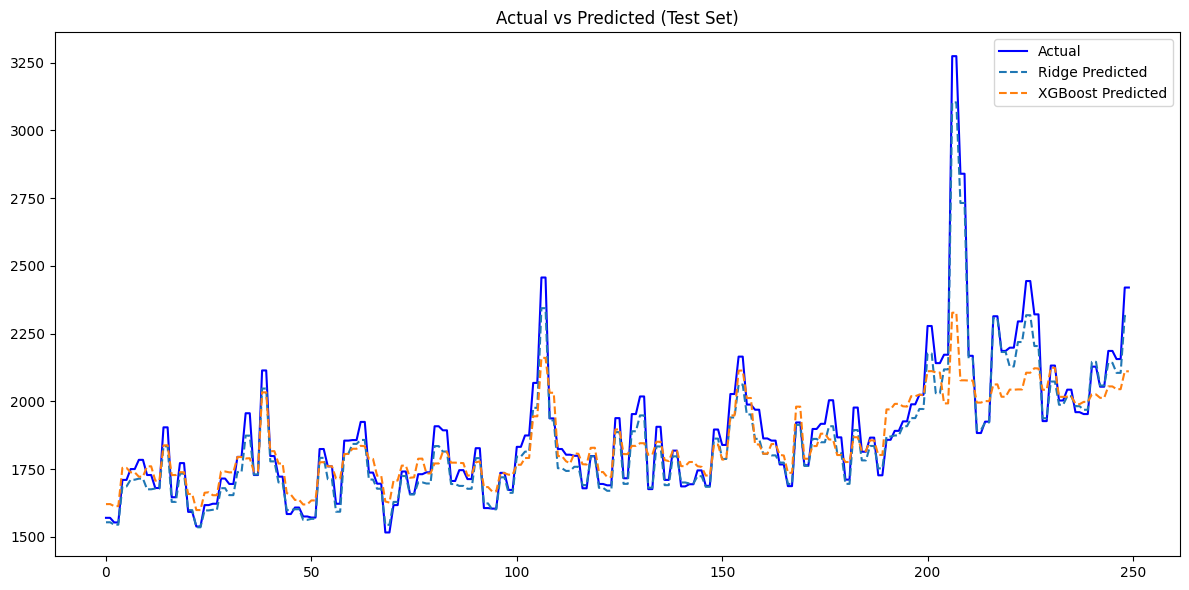

‚úÖ ÏòàÏ∏° Í∑∏ÎûòÌîÑ Ï†ÄÏû• ÏôÑÎ£å: final_model_predictions.png
‚úÖ Î™®Îç∏ Ï†ÄÏû• ÏôÑÎ£å (Ridge_model.pkl, XGBoost_model.pkl)


In [8]:
# ==============================
# 0. ÌôòÍ≤Ω ÏÑ§Ï†ï
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import RidgeCV
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
import joblib

# ==============================
# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ (v6)
# ==============================
df = pd.read_csv("../data/daegu_gyeongbuk_training_dataset_v6.csv")

drop_cols = ["date", "region"]
X = df.drop(columns=["deaths_total"] + drop_cols)
y = df["deaths_total"].fillna(df["deaths_total"].median())

# ==============================
# 2. ÌïôÏäµ/Í≤ÄÏ¶ù/ÌÖåÏä§Ìä∏ Î∂ÑÎ¶¨ + Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
# ==============================
# Î®ºÏ†Ä train/test Î∂ÑÎ¶¨
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)
# train/valid Î∂ÑÎ¶¨
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, shuffle=False
)

# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ (median)
imputer = SimpleImputer(strategy="median")
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

# ==============================
# 3. Î™®Îç∏ Ï†ïÏùò (Ridge, XGBoostÎßå)
# ==============================
models = {
    "Ridge": RidgeCV(alphas=np.logspace(-3, 3, 20), cv=5),
    "XGBoost": XGBRegressor(
        n_estimators=300, learning_rate=0.05,
        max_depth=5, subsample=0.8, colsample_bytree=0.8,
        random_state=42
    )
}

# ==============================
# 4. ÌèâÍ∞Ä Ìï®Ïàò
# ==============================
def evaluate_model(model, X_tr, y_tr, X_val, y_val, X_te, y_te):
    model.fit(X_tr, y_tr)
    val_preds = model.predict(X_val)
    test_preds = model.predict(X_te)

    metrics = {
        "Val_MAE": mean_absolute_error(y_val, val_preds),
        "Val_RMSE": np.sqrt(mean_squared_error(y_val, val_preds)),
        "Val_R¬≤": r2_score(y_val, val_preds),
        "Test_MAE": mean_absolute_error(y_te, test_preds),
        "Test_RMSE": np.sqrt(mean_squared_error(y_te, test_preds)),
        "Test_R¬≤": r2_score(y_te, test_preds)
    }
    return metrics, val_preds, test_preds


# ==============================
# 5. ÌïôÏäµ & Í≤ÄÏ¶ù & ÌÖåÏä§Ìä∏ ÌèâÍ∞Ä
# ==============================
results = []
pred_dict = {}
for name, model in models.items():
    metrics, val_preds, test_preds = evaluate_model(
        model, X_train, y_train, X_val, y_val, X_test, y_test
    )
    results.append({"Model": name, **metrics})
    pred_dict[name] = test_preds

results_df = pd.DataFrame(results)
results_df.to_csv("final_model_results.csv", index=False)
print("‚úÖ Í≤∞Í≥º Ï†ÄÏû• ÏôÑÎ£å: final_model_results.csv")
print(results_df)

# ==============================
# 6. ÏòàÏ∏° Í≤∞Í≥º ÏãúÍ∞ÅÌôî
# ==============================
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual", color="blue")
for name, preds in pred_dict.items():
    plt.plot(preds, linestyle="--", label=f"{name} Predicted")
plt.title("Actual vs Predicted (Test Set)")
plt.legend()
plt.tight_layout()
plt.savefig("final_model_predictions.png")
plt.show()
print("‚úÖ ÏòàÏ∏° Í∑∏ÎûòÌîÑ Ï†ÄÏû• ÏôÑÎ£å: final_model_predictions.png")

# ==============================
# 7. Î™®Îç∏ Ï†ÄÏû•
# ==============================
for name, model in models.items():
    joblib.dump(model, f"{name}_model.pkl")
print("‚úÖ Î™®Îç∏ Ï†ÄÏû• ÏôÑÎ£å (Ridge_model.pkl, XGBoost_model.pkl)")

# ==============================
# 8. Ìñ•ÌõÑ ÏàòÏöî ÏòàÏ∏° ÏòàÏãú
# ==============================
# (X_future: Ìñ•ÌõÑ Îç∞Ïù¥ÌÑ∞ÏÖã ÎßåÎì§Ïñ¥ ÎÑ£ÏúºÎ©¥ ÎèôÏùºÌïòÍ≤å ÏÇ¨Ïö©)
# X_future = ... (Ï∂îÍ∞Ä ÏûÖÎ†•)
# X_future = imputer.transform(X_future)
# preds_future = models["XGBoost"].predict(X_future)
# print("Ìñ•ÌõÑ ÌôîÏû• ÏàòÏöî ÏòàÏ∏°:", preds_future[:10])